# 1) Load the ECG data set

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os

directory = "./norwegian-endurance-athlete-ecg-database-1.0.0/"
ECGs = []
for ecgfilename in sorted(os.listdir(directory)):
    if ecgfilename.endswith(".dat"):
        record_path = os.path.join(directory, ecgfilename[:-4]) # remove ".dat"
        signal, fields = wfdb.rdsamp(record_path)
        ECGs.append(signal)

ECGs = np.array(ECGs, dtype=object)
fs = 500

#Plot alle 12 leads for 1 patient

# 2) Plot ECG leads 1-12 for one person as subplots in one figure.

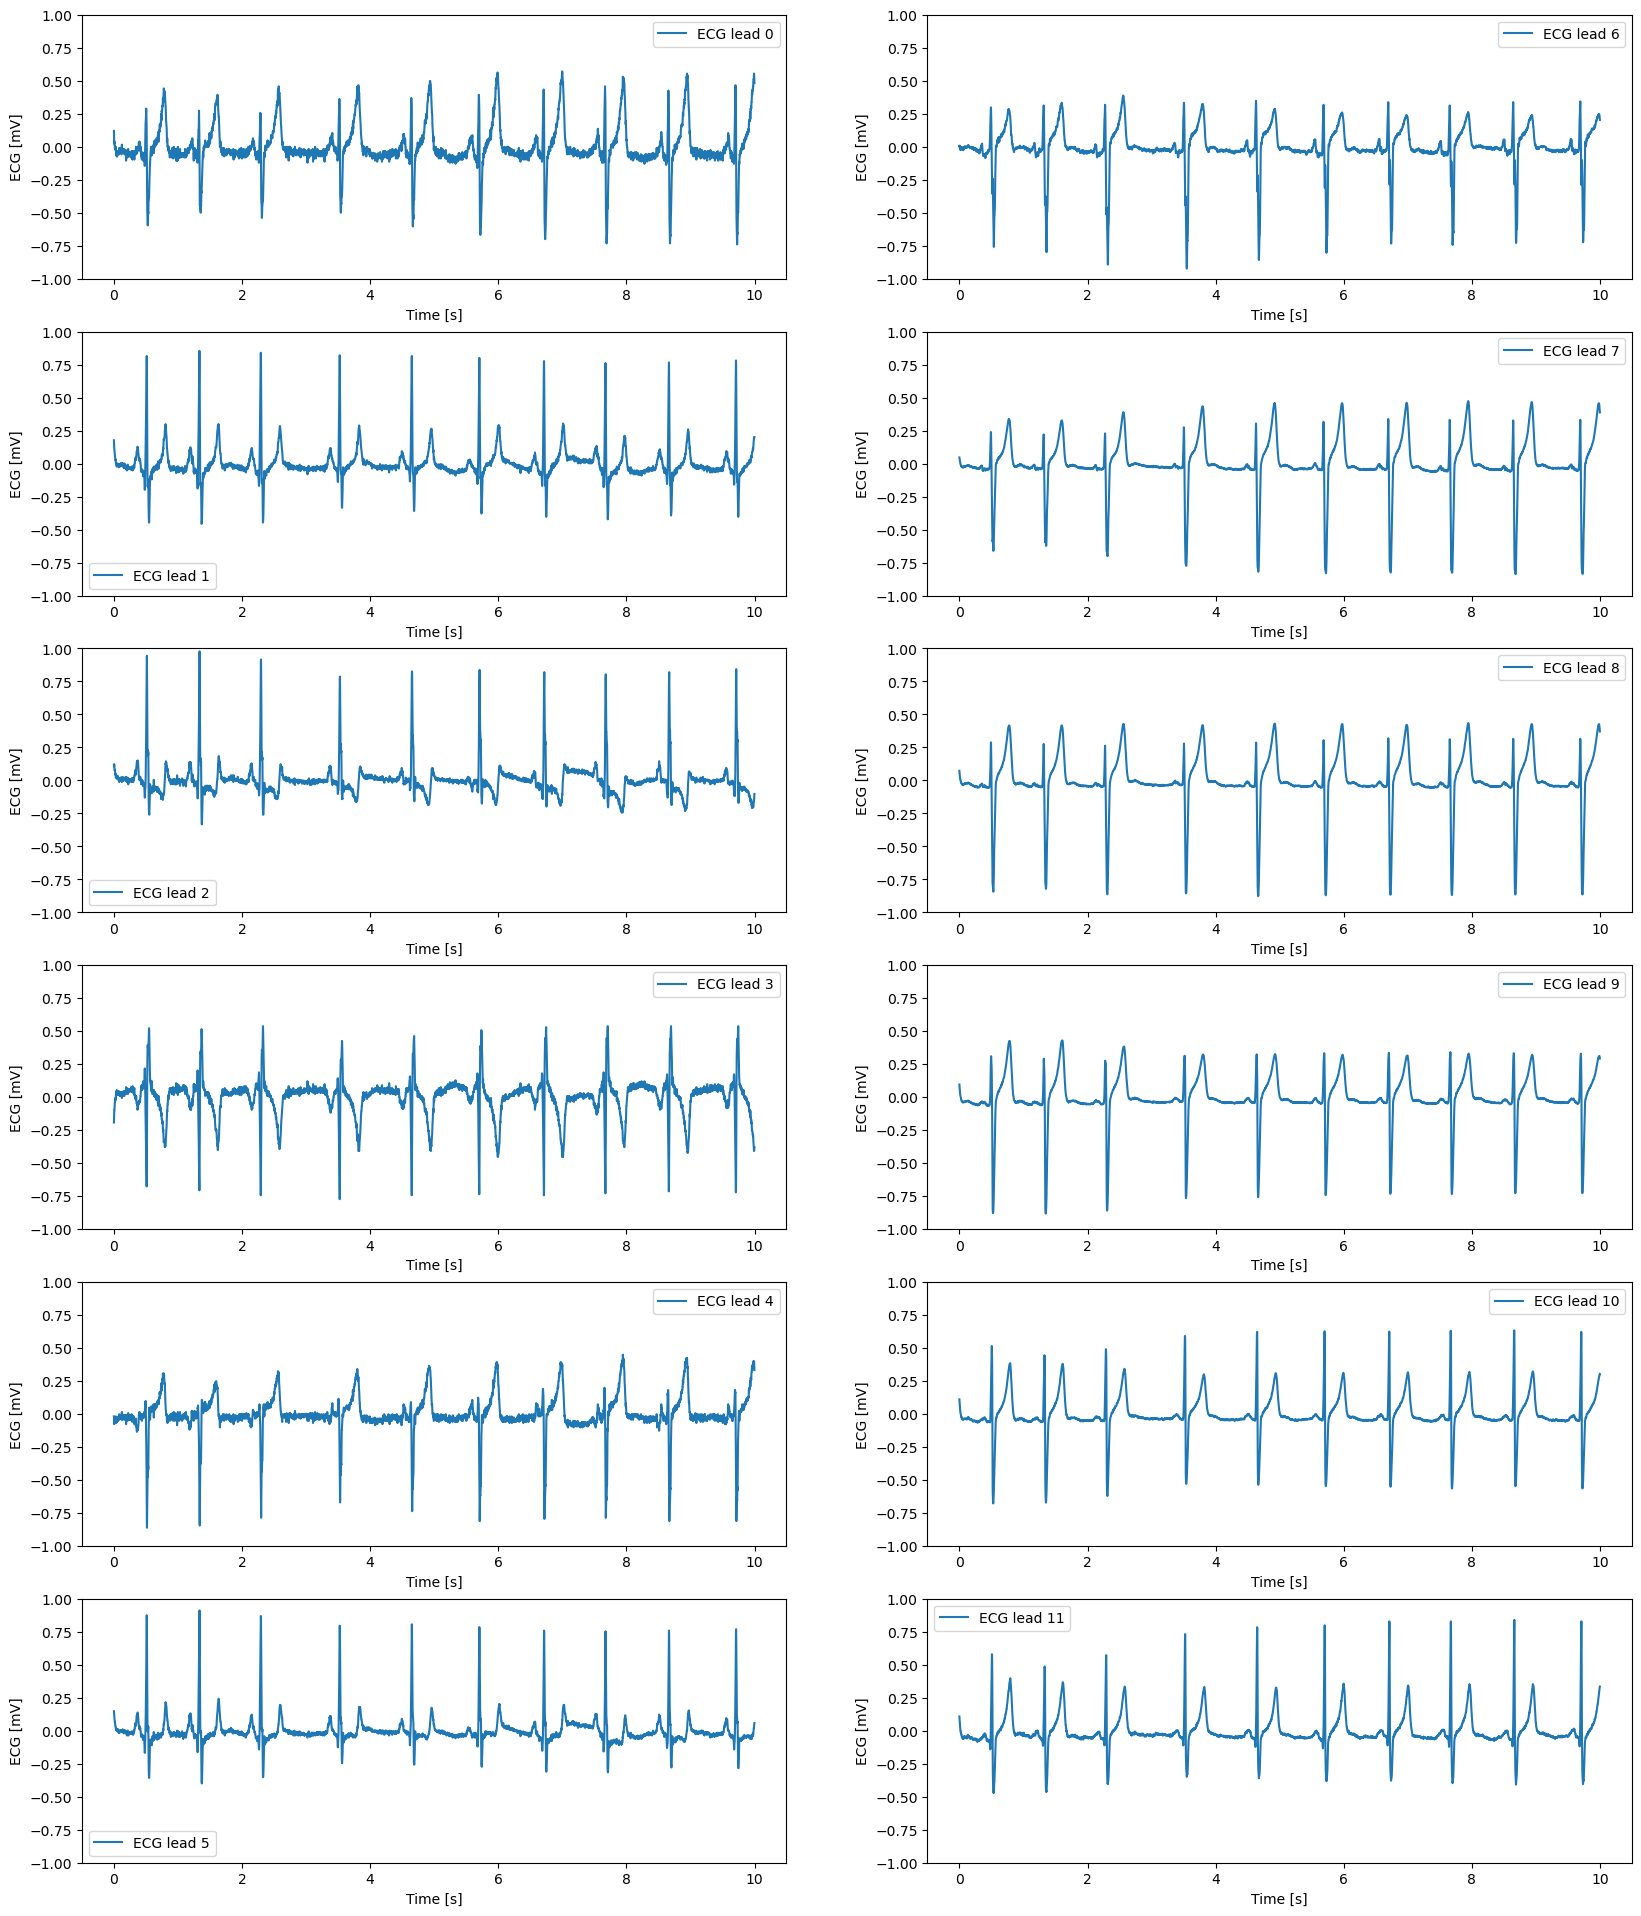

In [40]:
fig, axs = plt.subplots(6,2, figsize=(20,24))
column = 0
row = 0

for lead in range(0,12):
    ecg = ECGs[0,:,lead]
    time = np.arange(len(ecg))/fs
    ecg = np.asarray(ecg, dtype=float)
    ecg = ecg-np.mean(ecg)

    axs[row,column].plot(time,ecg, label = f"ECG lead {lead}")
    axs[row,column].set_ylim(-1, 1)
    axs[row,column].legend()
    axs[row,column].set_xlabel("Time [s]")
    axs[row,column].set_ylabel("ECG [mV]")

    row += 1
    if lead == 5:
        column += 1
        row = 0


plt.show()

# 3) Plot ECG lead 2 for 12 (or all 28) persons as subplots in one figure.

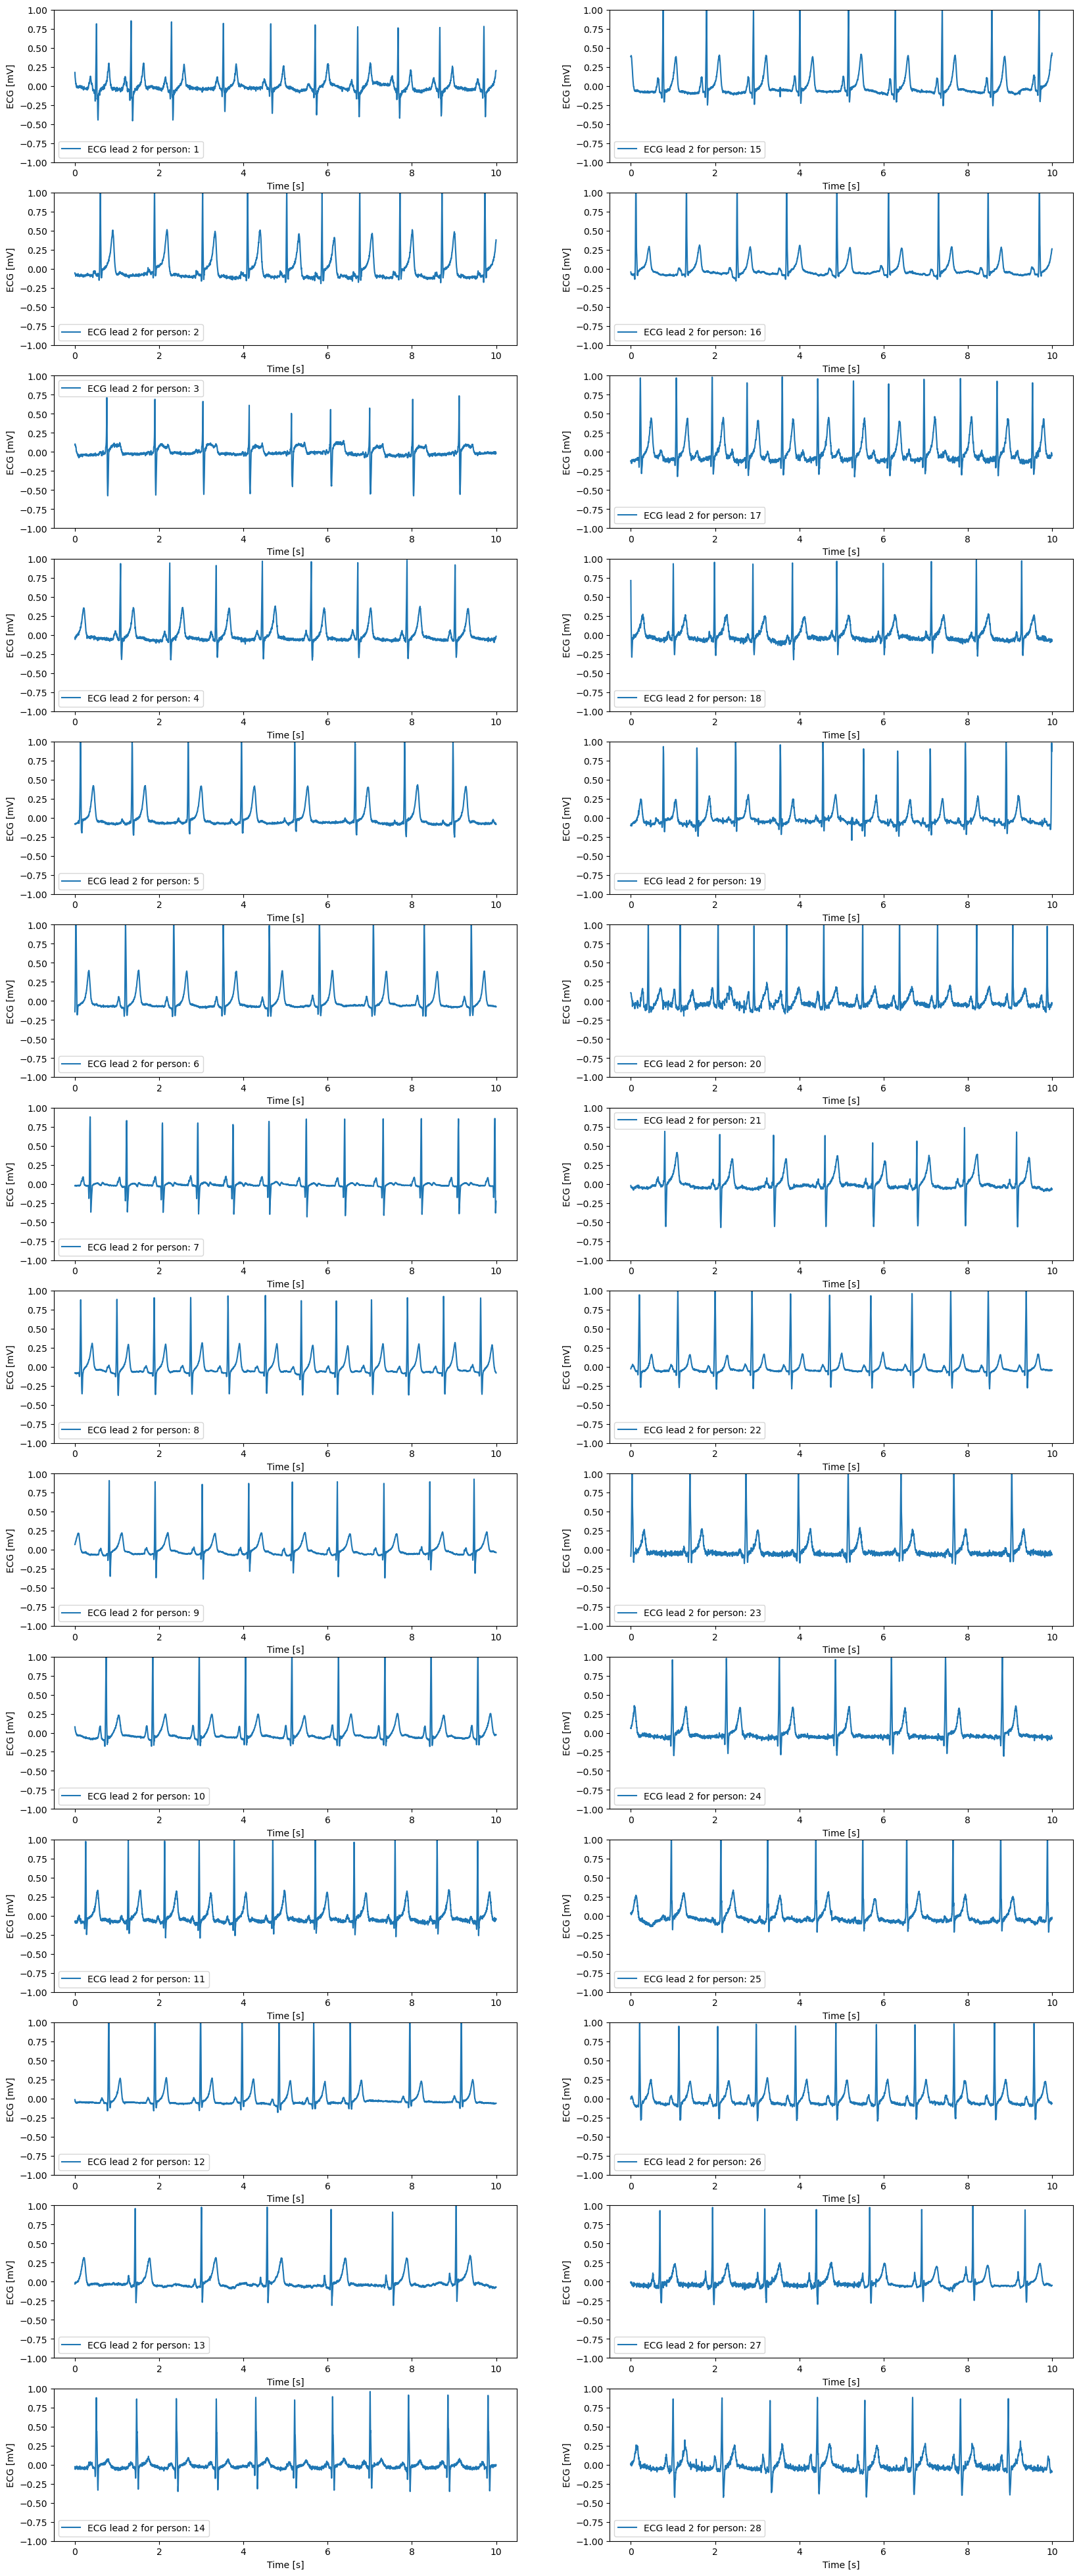

In [41]:
fig, axs = plt.subplots(14,2, figsize=(20,50))
column = 0
row = 0

for person in range(0,28):
    ecg = ECGs[person,:,1]
    time = np.arange(len(ecg))/fs
    ecg = np.asarray(ecg, dtype=float)
    ecg = ecg-np.mean(ecg)

    axs[row,column].plot(time,ecg, label = f"ECG lead 2 for person: {person+1}")
    axs[row,column].set_ylim(-1, 1)
    axs[row,column].legend()
    axs[row,column].set_xlabel("Time [s]")
    axs[row,column].set_ylabel("ECG [mV]")

    row += 1
    if person == 13:
        column += 1
        row = 0

plt.show()

# 4) For all 28 persons, calculate periodograms for ECG lead 2 and plot them as a colormap

In [87]:
import numpy as np
import matplotlib.pyplot as plt

n_people = 28 # Antal atleter vi vil plotte
n_samples = 2501 # Antal samples i datasets
freq = np.linspace(0, fs/2, n_samples) # Frekvens akse

#Beregn Power Spectral Density for alle atleter. Saml i en lists.
powers = []
for person in range(0,n_people):
    ecg = ECGs[person,:,1]
    ecg = ECGs[person,:,1]
    ecg = np.asarray(ecg, dtype=float)
    fft=np.fft.rfft(ecg)
    fft_abs=abs(fft)
    psd = (fft_abs**2)/(len(ecg)*fs)
    powers.append(psd)

#Formater så psd for hver atlet svarer til en kolonne
power_matrix = np.column_stack(powers)

Vi plotter først med de absolutte værdier.

y-akse plottes fra 0 og til Nyqist frekvensen fs/2.

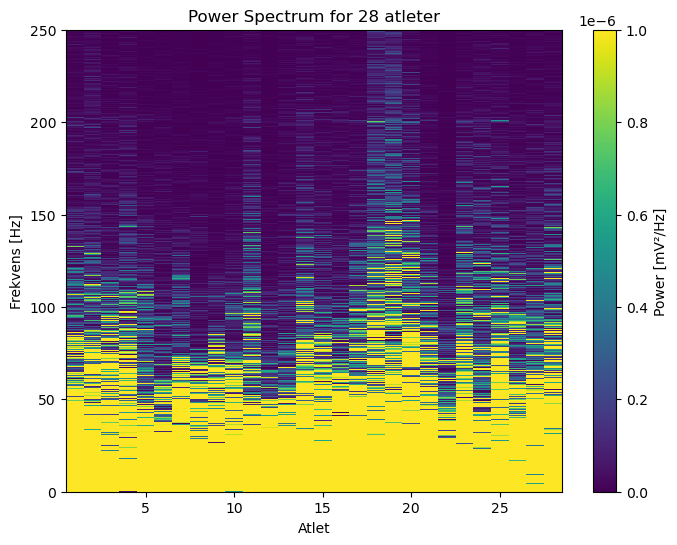

In [88]:
people = np.arange(1, n_people + 1) # Til X-akse
X, Y = np.meshgrid(people, freq) # Til color mesh

plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(X, Y, power_matrix,
                     shading='auto',
                     vmin=0, vmax=0.000001)

plt.xlabel("Atlet")
plt.ylabel("Frekvens [Hz]")
plt.ylim(0,fs/2)
plt.title(f"Power Spectrum for {n_people} atleter")

plt.colorbar(pcm, label="Power [mV²/Hz]")

plt.show()

Dernæst plotter vi på en log-10 akse.

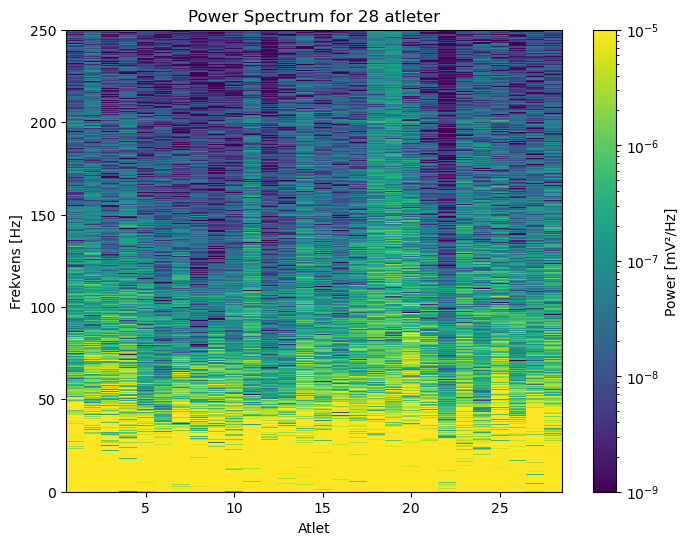

In [89]:
plt.figure(figsize=(8, 6))
from matplotlib.colors import LogNorm

pcm = plt.pcolormesh(X, Y, power_matrix,
                     shading='auto',
                     norm=LogNorm(vmin=1e-9, vmax=1e-5))

plt.xlabel("Atlet")
plt.ylabel("Frekvens [Hz]")
plt.ylim(0,fs/2)
plt.title(f"Power Spectrum for {n_people} atleter")

plt.colorbar(pcm, label="Power [mV²/Hz]")

plt.show()